# Simulating a Real-World Phenomenon - Irish Discrimination Rates

The real-world phenomenon I chose to review was the relationship between male / female genders and the discrimination rates in Ireland. This simulated dataset will be based on data derived from the Central Statistics Office QNHS Equality report recorded in quarter three of 2014. [1]

The Quarterly National Household Survey (QNHS) is a large-scale, nationwide survey of households in Ireland. The QNHS conducts special modules, i.e. reports on different social topics each quarter. [8] 

Per this report, 12% of people reported to have felt discriminated against over the previous two years. As the number of males and females who took in the study is not explicitly detailed, a 50% rate of participation for each gender will be assumed. Table 2.4, [1], details that 630 males and 1,069 females reported discrimination. These figures will be used as the basis of the generated dataset.  


## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline


## Calculate Total Survey Size

In [4]:
# 2014 Ratio: https://www.cso.ie/en/releasesandpublications/er/q-eq/qnhsequalitymodulequarter32014/

total_disc_yes = 0.12

# Of 12% Yes
M = 630
F = 1069
T = M + F

# Estimate Total Survey Size
T = int(round(T / 0.12))
print("Estimated Total Survey Size: ", T)

# Assume 50% M/F
hlf_T = T /2

M_R = (M/hlf_T)*100
F_R = (F/hlf_T)*100

print("Percentage of Males who felt discriminated against: ", M_R)
print("Percentage of Females who felt discriminated against: ",F_R)

Estimated Total Survey Size:  14158
Percentage of Males who felt discriminated against:  8.899562085040259
Percentage of Females who felt discriminated against:  15.101002966520696


## Sex

In [5]:
# Set Array
sex_x = ['Male', 'Female']


# Build Dataframe - Assume 50% Males and Females
sex = np.random.choice(sex_x, T, p=[0.5, 0.5])

df=pd.DataFrame(data={'Sex': sex})


print(df)

          Sex
0        Male
1      Female
2        Male
3        Male
4        Male
5      Female
6        Male
7        Male
8      Female
9      Female
10     Female
11       Male
12       Male
13     Female
14     Female
15     Female
16     Female
17       Male
18     Female
19       Male
20       Male
21       Male
22     Female
23       Male
24     Female
25     Female
26       Male
27     Female
28       Male
29       Male
...       ...
14128  Female
14129  Female
14130    Male
14131  Female
14132  Female
14133  Female
14134    Male
14135  Female
14136    Male
14137  Female
14138    Male
14139  Female
14140  Female
14141    Male
14142    Male
14143    Male
14144    Male
14145    Male
14146    Male
14147    Male
14148    Male
14149    Male
14150  Female
14151  Female
14152    Male
14153    Male
14154  Female
14155    Male
14156  Female
14157    Male

[14158 rows x 1 columns]


## Experienced Discrimination

In [6]:
# Set Array
disc_xm = ['M_Y', 'M_N']
disc_xf = ['F_Y', 'F_N']

M_Y = M
F_Y = F

# Assume 50% Males and 50% Females

M_N = hlf_T - M_Y
F_N = hlf_T - F_Y

M_T = M_Y + M_N
F_T = F_Y + F_N

M_Y = M_Y/M_T
M_N = M_N/M_T
F_Y = F_Y/F_T
F_N = F_N/F_T

print("% Males Yes: ", round(M_Y*100,2))
print("% Males No: ", round(M_N*100,2))
print()
print("% Females Yes: ", round(F_Y*100,2))
print("% Females No: ", round(F_N*100,2))
print()

# Male
disc_yes_m =  df['Sex']=='Male'
df_m = df[disc_yes_m]

# Female
disc_yes_f =  df['Sex']=='Female'
df_f = df[disc_yes_f]


# Male
yes_count_xm = df_m['Sex']
yes_count_m = yes_count_xm.count()

# Female
yes_count_xf = df_f['Sex']
yes_count_f = yes_count_xf.count()

# Build Dataframe
disc_m = np.random.choice(disc_xm, yes_count_m, p=[M_Y, M_N])
disc_f = np.random.choice(disc_xf, yes_count_f, p=[F_Y, F_N])


# Set Type Column
df_m['Discriminated Against'] = disc_m
df_f['Discriminated Against'] = disc_f


# Join Dataframes
frames_a = [df_m, df_f]

df = pd.concat(frames_a)

# Sort by index
df.sort_index(inplace=True)


df ['Discriminated Against'].replace({'M_Y':'Yes', 'M_N':'No', 'F_Y':'Yes', 'F_N':'No'}, inplace=True)


print(df)

% Males Yes:  8.9
% Males No:  91.1

% Females Yes:  15.1
% Females No:  84.9

          Sex Discriminated Against
0        Male                    No
1      Female                    No
2        Male                    No
3        Male                    No
4        Male                    No
5      Female                    No
6        Male                    No
7        Male                    No
8      Female                    No
9      Female                    No
10     Female                   Yes
11       Male                    No
12       Male                    No
13     Female                   Yes
14     Female                    No
15     Female                    No
16     Female                    No
17       Male                    No
18     Female                    No
19       Male                    No
20       Male                    No
21       Male                    No
22     Female                    No
23       Male                    No
24     Female        

## Discrimination Type

As multiple responses were allowed for discrimination type, the results will be weighted to generate new percentages. This will ensure that the probabilities will all equal 1. It will also ensure that values with higher percentages will be correctly represented in the simulated dataset.  Subsequently, it will allow visualization of the relationship between gender and discrimination types. [2]

In [7]:
# Set Array
discrim_type = ['Gender', 'Marital Status', 'Family Status', 'Age', 'Disability', 'Race', 'Other']

# Males

# Set Discrimination Types %
gen_m = 9
mar_m = 3
fam_m = 9
age_m = 24
dis_m = 6
rac_m = 21
oth_m = 41

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_m = gen_m + mar_m + fam_m + age_m + dis_m +  rac_m + oth_m

gen_m = gen_m/tot_disc_m
mar_m = mar_m/tot_disc_m
fam_m = fam_m/tot_disc_m
age_m = age_m/tot_disc_m
dis_m = dis_m/tot_disc_m
rac_m = rac_m/tot_disc_m
oth_m = oth_m/tot_disc_m

print("Weighted % Males - Gender: ", round(gen_m*100,2))
print("Weighted % Males - Marital Status: ", round(mar_m*100,2))
print("Weighted % Males - Family Status: ", round(fam_m*100,2))
print("Weighted % Males - Age: ", round(age_m*100,2))
print("Weighted % Males - Disability: ", round(dis_m*100,2))
print("Weighted % Males - Race: ", round(rac_m*100,2))
print("Weighted % Males - Other: ", round(oth_m*100,2))
print()

# Females

# Set Discrimination Types %
gen_f = 14 
mar_f = 5
fam_f = 14
age_f = 24
dis_f = 6
rac_f = 17
oth_f = 36

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_f = gen_f + mar_f + fam_f + age_f + dis_f +  rac_f + oth_f

gen_f = gen_f/tot_disc_f
mar_f = mar_f/tot_disc_f
fam_f = fam_f/tot_disc_f
age_f = age_f/tot_disc_f
dis_f = dis_f/tot_disc_f
rac_f = rac_f/tot_disc_f
oth_f = oth_f/tot_disc_f

print("Weighted % Females - Gender: ", round(gen_f*100,2))
print("Weighted % Females - Marital Status: ", round(mar_f*100,2))
print("Weighted % Females - Family Status: ", round(fam_f*100,2))
print("Weighted % Females - Age: ", round(age_f*100,2))
print("Weighted % Females - Disability: ", round(dis_f*100,2))
print("Weighted % Females - Race: ", round(rac_f*100,2))
print("Weighted % Females - Other: ", round(oth_f*100,2))
print()


# Split Dataframe
disc_yes =  df['Discriminated Against']=='Yes'
df_yes = df[disc_yes]

# Male
disc_yes_m =  df_yes['Sex']=='Male'
df_yes_m = df_yes[disc_yes_m]

# Female
disc_yes_f =  df_yes['Sex']=='Female'
df_yes_f = df_yes[disc_yes_f]


disc_no =  df['Discriminated Against']=='No'
df_no = df[disc_no]

# Set Count for Yes

# Male
yes_count_xm = df_yes_m['Discriminated Against']
yes_count_m = yes_count_xm.count()

# Female
yes_count_xf = df_yes_f['Discriminated Against']
yes_count_f = yes_count_xf.count()

# Populate Weighted Random Choice

# Male
type_disc_m = np.random.choice(discrim_type, yes_count_m, p=[gen_m, mar_m, fam_m, age_m, dis_m, rac_m, oth_m])

# Female
type_disc_f = np.random.choice(discrim_type, yes_count_f, p=[gen_f, mar_f, fam_f, age_f, dis_f, rac_f, oth_f])

# Set Type Column
df_no['Type'] = 'NA'
df_yes_m['Type'] = type_disc_m
df_yes_f['Type'] = type_disc_f


# Join Dataframes - [3]
frames_a = [df_yes_m, df_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)
print(df)

Weighted % Males - Gender:  7.96
Weighted % Males - Marital Status:  2.65
Weighted % Males - Family Status:  7.96
Weighted % Males - Age:  21.24
Weighted % Males - Disability:  5.31
Weighted % Males - Race:  18.58
Weighted % Males - Other:  36.28

Weighted % Females - Gender:  12.07
Weighted % Females - Marital Status:  4.31
Weighted % Females - Family Status:  12.07
Weighted % Females - Age:  20.69
Weighted % Females - Disability:  5.17
Weighted % Females - Race:  14.66
Weighted % Females - Other:  31.03

          Sex Discriminated Against           Type
0        Male                    No             NA
1      Female                    No             NA
2        Male                    No             NA
3        Male                    No             NA
4        Male                    No             NA
5      Female                    No             NA
6        Male                    No             NA
7        Male                    No             NA
8      Female                

## Social Setting

Like discrimination type, multiple responses were allowed for social setting were the discrimination occurred. The results will again be weighted to generate new percentages. This will ensure that the probabilities will all equal 1. There was no clearly indicated relationship between where the discrimination occurred and the type of discrimination. Due to this, the data will be populated randomly. The relationship assessment will occur between Sex and the other variables. [2]

In [8]:
# Set Array
discrim_set = ['Workplace', 'Looking for Work', 'Public Place', 'Banks', 'Education', 'Obtaining Housing', 'Accessing health services', 'Using transport services', 'Accessing public services']

# Note there is no clear connection detailed between social setting and discrimination type, therefore random

# Males

# Set Discrimination Setting %
wrk_m = 26
lrk_m = 31
pub_m = 17
ban_m = 16
edu_m = 4
hou_m = 10
hea_m = 11
tra_m = 4
ser_m = 10

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_set_m = wrk_m + lrk_m + pub_m + ban_m + edu_m + hou_m + hea_m + tra_m + ser_m

wrk_m = wrk_m/tot_disc_set_m
lrk_m = lrk_m/tot_disc_set_m
pub_m = pub_m/tot_disc_set_m
ban_m = ban_m/tot_disc_set_m
edu_m = edu_m/tot_disc_set_m
hou_m = hou_m/tot_disc_set_m
hea_m = hea_m/tot_disc_set_m
tra_m = tra_m/tot_disc_set_m
ser_m = ser_m/tot_disc_set_m

print("Weighted % Males - Workplace: ", round(wrk_m*100,2))
print("Weighted % Males - Looking for Work: ", round(lrk_m*100,2))
print("Weighted % Males - Public Place: ", round(pub_m*100,2))
print("Weighted % Males - Banks: ", round(ban_m*100,2))
print("Weighted % Males - Education: ", round(edu_m*100,2))
print("Weighted % Males - Obtaining Housing: ", round(hou_m*100,2))
print("Weighted % Males - Accessing health services: ", round(hea_m*100,2))
print("Weighted % Males - Using transport services: ", round(tra_m*100,2))
print("Weighted % Males - Accessing public services: ", round(ser_m*100,2))
print()


# Females

# Set Discrimination Setting %
wrk_f = 31
lrk_f = 22
pub_f = 19
ban_f = 16
edu_f = 5
hou_f = 11
hea_f = 15
tra_f = 5
ser_f = 7

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_set_f = wrk_f + lrk_f + pub_f + ban_f + edu_f + hou_f + hea_f + tra_f + ser_f

wrk_f = wrk_f/tot_disc_set_f
lrk_f = lrk_f/tot_disc_set_f
pub_f = pub_f/tot_disc_set_f
ban_f = ban_f/tot_disc_set_f
edu_f = edu_f/tot_disc_set_f
hou_f = hou_f/tot_disc_set_f
hea_f = hea_f/tot_disc_set_f
tra_f = tra_f/tot_disc_set_f
ser_f = ser_f/tot_disc_set_f

print("Weighted % Females - Workplace: ", round(wrk_f*100,2))
print("Weighted % Females - Looking for Work: ", round(lrk_f*100,2))
print("Weighted % Females - Public Place: ", round(pub_f*100,2))
print("Weighted % Females - Banks: ", round(ban_f*100,2))
print("Weighted % Females - Education: ", round(edu_f*100,2))
print("Weighted % Females - Obtaining Housing: ", round(hou_f*100,2))
print("Weighted % Females - Accessing health services: ", round(hea_f*100,2))
print("Weighted % Females - Using transport services: ", round(tra_f*100,2))
print("Weighted % Females - Accessing public services: ", round(ser_f*100,2))
print()

# Split Dataframe
disc_set_yes =  df['Discriminated Against']=='Yes'
df_set_yes = df[disc_set_yes]

# Male
disc_set_yes_m =  df_set_yes['Sex']=='Male'
df_set_yes_m = df_set_yes[disc_set_yes_m]

# Female
disc_set_yes_f =  df_set_yes['Sex']=='Female'
df_set_yes_f = df_set_yes[disc_set_yes_f]


disc_set_no =  df['Discriminated Against']=='No'
df_set_no = df[disc_set_no]

# Set Count for Yes

# Male
yes_set_count_xm = df_set_yes_m['Discriminated Against']
yes_set_count_m = yes_set_count_xm.count()

# Female
yes_set_count_xf = df_set_yes_f['Discriminated Against']
yes_set_count_f = yes_set_count_xf.count()

# Populate Weighted Random Choice

# Male
type_disc_set_m = np.random.choice(discrim_set, yes_set_count_m, p=[wrk_m, lrk_m ,pub_m ,ban_m ,edu_m ,hou_m, hea_m, tra_m, ser_m])

# Female
type_disc_set_f = np.random.choice(discrim_set, yes_set_count_f, p=[wrk_f, lrk_f ,pub_f ,ban_f ,edu_f ,hou_f, hea_f, tra_f, ser_f])

# Set Type Column
df_set_no['Social Setting'] = 'NA'
df_set_yes_m['Social Setting'] = type_disc_set_m
df_set_yes_f['Social Setting'] = type_disc_set_f


# Join Dataframes - [3]
frames_a = [df_set_yes_m, df_set_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_set_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)
print(df)

Weighted % Males - Workplace:  20.16
Weighted % Males - Looking for Work:  24.03
Weighted % Males - Public Place:  13.18
Weighted % Males - Banks:  12.4
Weighted % Males - Education:  3.1
Weighted % Males - Obtaining Housing:  7.75
Weighted % Males - Accessing health services:  8.53
Weighted % Males - Using transport services:  3.1
Weighted % Males - Accessing public services:  7.75

Weighted % Females - Workplace:  23.66
Weighted % Females - Looking for Work:  16.79
Weighted % Females - Public Place:  14.5
Weighted % Females - Banks:  12.21
Weighted % Females - Education:  3.82
Weighted % Females - Obtaining Housing:  8.4
Weighted % Females - Accessing health services:  11.45
Weighted % Females - Using transport services:  3.82
Weighted % Females - Accessing public services:  5.34

          Sex Discriminated Against           Type             Social Setting
0        Male                    No             NA                         NA
1      Female                    No             NA

## Action Taken

Like before, there is no connection detailed between whether action was taken and the other variables except sex.  The results will again be weighted to generate new percentages. This will ensure that the probabilities will all equal 1. [2]

In [9]:
# Set Array
action_set = ['Verbal', 'Written', 'Offical / Legal', 'No Action']

# Note there is no clear connection detailed between Action Taken to social setting and discrimination type, therefore random

# Males

# Set Discrimination Setting %
ver_m = 23
wri_m = 7
off_m = 10
noa_m = 65

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_act_set_m = ver_m + wri_m + off_m + noa_m

ver_m = ver_m/tot_act_set_m
wri_m = wri_m/tot_act_set_m
off_m = off_m/tot_act_set_m
noa_m = noa_m/tot_act_set_m

print("Weighted % Males - Verbal Action: ", round(ver_m*100,2))
print("Weighted % Males - Written Action: ", round(wri_m*100,2))
print("Weighted % Males - Legal or Offical Action: ", round(off_m*100,2))
print("Weighted % Males - No Action: ", round(noa_m*100,2))
print()



# Females

# Set Discrimination Setting %
ver_f = 27
wri_f = 9
off_f = 9
noa_f = 63

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_act_set_f = ver_f + wri_f + off_f + noa_f

ver_f = ver_f/tot_act_set_f
wri_f = wri_f/tot_act_set_f
off_f = off_f/tot_act_set_f
noa_f = noa_f/tot_act_set_f

print("Weighted % Females - Verbal Action: ", round(ver_f*100,2))
print("Weighted % Females - Written Action: ", round(wri_f*100,2))
print("Weighted % Females - Legal or Offical Action: ", round(off_f*100,2))
print("Weighted % Females - No Action: ", round(noa_f*100,2))
print()

# Split Dataframe
disc_set_yes =  df['Discriminated Against']=='Yes'
df_set_yes = df[disc_set_yes]

# Male
disc_set_yes_m =  df_set_yes['Sex']=='Male'
df_set_yes_m = df_set_yes[disc_set_yes_m]

# Female
disc_set_yes_f =  df_set_yes['Sex']=='Female'
df_set_yes_f = df_set_yes[disc_set_yes_f]


disc_set_no =  df['Discriminated Against']=='No'
df_set_no = df[disc_set_no]

# Set Count for Yes

# Male
yes_set_count_xm = df_set_yes_m['Discriminated Against']
yes_set_count_m = yes_set_count_xm.count()

# Female
yes_set_count_xf = df_set_yes_f['Discriminated Against']
yes_set_count_f = yes_set_count_xf.count()

# Populate Weighted Random Choice

# Male
type_act_set_m = np.random.choice(action_set, yes_set_count_m, p=[ver_m, wri_m, off_m, noa_m])

# Female
type_act_set_f = np.random.choice(action_set, yes_set_count_f, p=[ver_f, wri_f, off_f, noa_f])

# Set Action Column
df_set_no['Type Action Taken'] = 'NA'
df_set_yes_m['Type Action Taken'] = type_act_set_m
df_set_yes_f['Type Action Taken'] = type_act_set_f


# Join Dataframes - [3]
frames_a = [df_set_yes_m, df_set_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_set_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)

# Add Action Y/N Column
df['Action Taken'] = df['Type Action Taken']
df ['Action Taken'].replace({'Verbal':'Yes', 'Written':'Yes', 'Offical / Legal':'Yes', 'No Action':'No'}, inplace=True)

print(df)

Weighted % Males - Verbal Action:  21.9
Weighted % Males - Written Action:  6.67
Weighted % Males - Legal or Offical Action:  9.52
Weighted % Males - No Action:  61.9

Weighted % Females - Verbal Action:  25.0
Weighted % Females - Written Action:  8.33
Weighted % Females - Legal or Offical Action:  8.33
Weighted % Females - No Action:  58.33

          Sex Discriminated Against           Type             Social Setting  \
0        Male                    No             NA                         NA   
1      Female                    No             NA                         NA   
2        Male                    No             NA                         NA   
3        Male                    No             NA                         NA   
4        Male                    No             NA                         NA   
5      Female                    No             NA                         NA   
6        Male                    No             NA                         NA   
7      

## Sort Columns

In [10]:
# Re-order Columns - [4]

df = df[["Sex","Discriminated Against","Type","Social Setting","Action Taken","Type Action Taken"]]
print(df)

          Sex Discriminated Against           Type             Social Setting  \
0        Male                    No             NA                         NA   
1      Female                    No             NA                         NA   
2        Male                    No             NA                         NA   
3        Male                    No             NA                         NA   
4        Male                    No             NA                         NA   
5      Female                    No             NA                         NA   
6        Male                    No             NA                         NA   
7        Male                    No             NA                         NA   
8      Female                    No             NA                         NA   
9      Female                    No             NA                         NA   
10     Female                   Yes          Other  Accessing health services   
11       Male               

## Plot

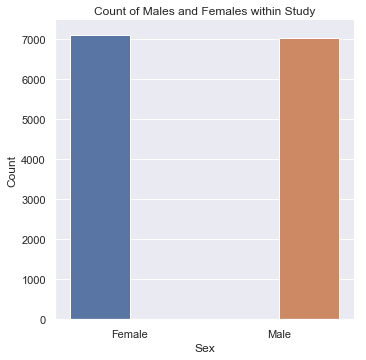

In [17]:
# Adapted from [5]
mf = sns.catplot(x="Sex", hue="Sex", kind="count", data=df)
mf.set(ylabel="Count")
mf.set(title="Count of Males and Females within Study")
plt.show()

There are approximately 50% Males and 50% Females (~7000 each).

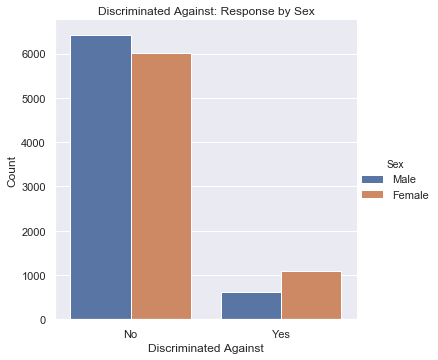

% Males Yes:  8.9
% Males No:  91.1

% Females Yes:  15.1
% Females No:  84.9



In [11]:
# Adapted from [5]
yn = sns.catplot(x="Discriminated Against", hue="Sex", kind="count", data=df)
yn.set(ylabel="Count")
yn.set(title="Discriminated Against: Response by Sex")
plt.show()

print("% Males Yes: ", round(M_Y*100,2))
print("% Males No: ", round(M_N*100,2))
print()
print("% Females Yes: ", round(F_Y*100,2))
print("% Females No: ", round(F_N*100,2))
print()

By graphing the *"Discriminated Against"* vaiable it is clear to see that the majority of people who took part in the survey did not feel as though they were discriminated against in the pervious two years.

It is also clear to see that more females are facing discrimination. (~6% more)

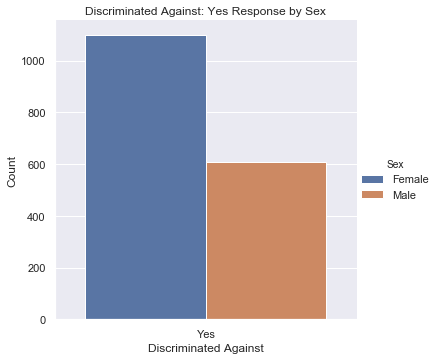

In [13]:
# Adapted from [5]
df_yes =  df['Discriminated Against']=='Yes'
df.yes = df[df_yes]

y = sns.catplot(x="Discriminated Against", hue="Sex", kind="count", data=df.yes)
y.set(ylabel="Count")
y.set(title="Discriminated Against: Yes Response by Sex")
plt.show()

Weighted % Males - Gender:  7.96
Weighted % Males - Marital Status:  2.65
Weighted % Males - Family Status:  7.96
Weighted % Males - Age:  21.24
Weighted % Males - Disability:  5.31
Weighted % Males - Race:  18.58
Weighted % Males - Other:  36.28

Weighted % Females - Gender:  12.07
Weighted % Females - Marital Status:  4.31
Weighted % Females - Family Status:  12.07
Weighted % Females - Age:  20.69
Weighted % Females - Disability:  5.17
Weighted % Females - Race:  14.66
Weighted % Females - Other:  31.03



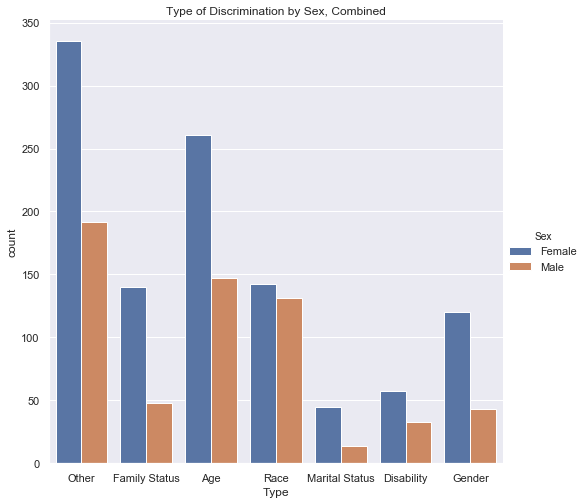

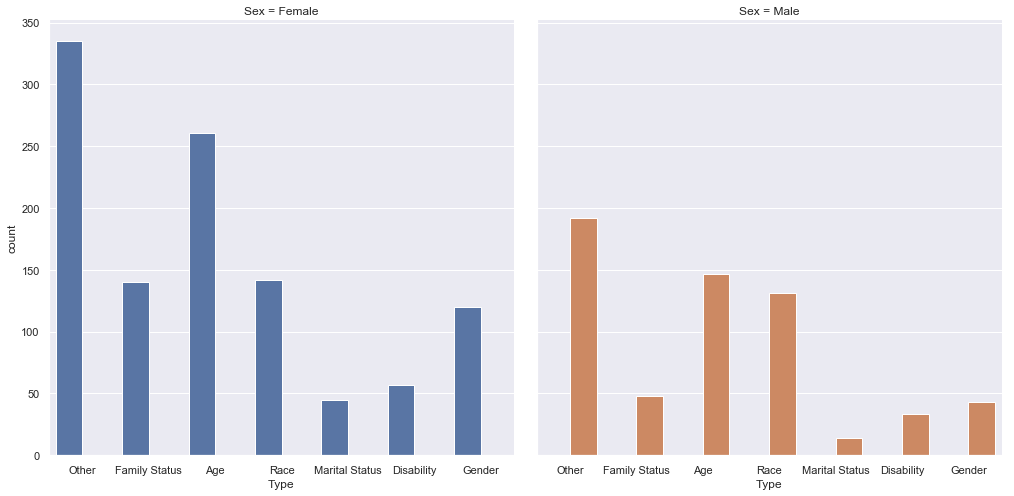

In [14]:
# Adapted from [5]
v = sns.catplot(x="Type", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Type of Discrimination by Sex, Combined")
g = sns.catplot(x="Type", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

print("Weighted % Males - Gender: ", round(gen_m*100,2))
print("Weighted % Males - Marital Status: ", round(mar_m*100,2))
print("Weighted % Males - Family Status: ", round(fam_m*100,2))
print("Weighted % Males - Age: ", round(age_m*100,2))
print("Weighted % Males - Disability: ", round(dis_m*100,2))
print("Weighted % Males - Race: ", round(rac_m*100,2))
print("Weighted % Males - Other: ", round(oth_m*100,2))
print()

print("Weighted % Females - Gender: ", round(gen_f*100,2))
print("Weighted % Females - Marital Status: ", round(mar_f*100,2))
print("Weighted % Females - Family Status: ", round(fam_f*100,2))
print("Weighted % Females - Age: ", round(age_f*100,2))
print("Weighted % Females - Disability: ", round(dis_f*100,2))
print("Weighted % Females - Race: ", round(rac_f*100,2))
print("Weighted % Females - Other: ", round(oth_f*100,2))
print()


The top three types of discrimination for both male and female genders are:
1.	Other (*Note: * This includes Sexual Orientation & Religious Beliefs)
2.	Age
3.	Race

It is interesting to note that although females do experience discrimination more frequently, males experience the same types to a lesser extent. Or at least to a lesser extent per this 2014 report. By viewing the graphs it can be seen that the only vast difference in the pattern is *“Family Status”* which is lower in occurance for males.


Weighted % Males - Workplace:  20.16
Weighted % Males - Looking for Work:  24.03
Weighted % Males - Public Place:  13.18
Weighted % Males - Banks:  12.4
Weighted % Males - Education:  3.1
Weighted % Males - Obtaining Housing:  7.75
Weighted % Males - Accessing health services:  8.53
Weighted % Males - Using transport services:  3.1
Weighted % Males - Accessing public services:  7.75

Weighted % Females - Workplace:  23.66
Weighted % Females - Looking for Work:  16.79
Weighted % Females - Public Place:  14.5
Weighted % Females - Banks:  12.21
Weighted % Females - Education:  3.82
Weighted % Females - Obtaining Housing:  8.4
Weighted % Females - Accessing health services:  11.45
Weighted % Females - Using transport services:  3.82
Weighted % Females - Accessing public services:  5.34



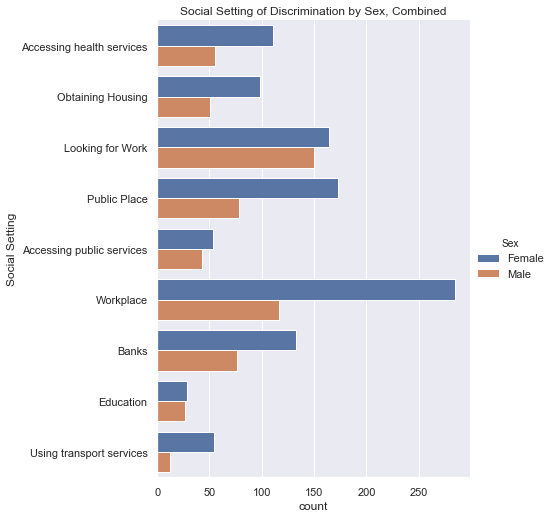

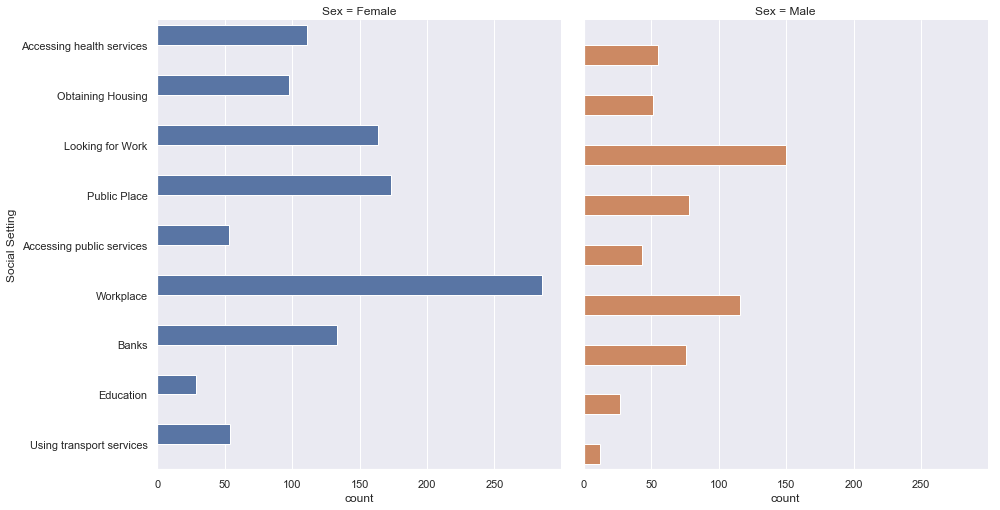

In [15]:
print("Weighted % Males - Workplace: ", round(wrk_m*100,2))
print("Weighted % Males - Looking for Work: ", round(lrk_m*100,2))
print("Weighted % Males - Public Place: ", round(pub_m*100,2))
print("Weighted % Males - Banks: ", round(ban_m*100,2))
print("Weighted % Males - Education: ", round(edu_m*100,2))
print("Weighted % Males - Obtaining Housing: ", round(hou_m*100,2))
print("Weighted % Males - Accessing health services: ", round(hea_m*100,2))
print("Weighted % Males - Using transport services: ", round(tra_m*100,2))
print("Weighted % Males - Accessing public services: ", round(ser_m*100,2))
print()

print("Weighted % Females - Workplace: ", round(wrk_f*100,2))
print("Weighted % Females - Looking for Work: ", round(lrk_f*100,2))
print("Weighted % Females - Public Place: ", round(pub_f*100,2))
print("Weighted % Females - Banks: ", round(ban_f*100,2))
print("Weighted % Females - Education: ", round(edu_f*100,2))
print("Weighted % Females - Obtaining Housing: ", round(hou_f*100,2))
print("Weighted % Females - Accessing health services: ", round(hea_f*100,2))
print("Weighted % Females - Using transport services: ", round(tra_f*100,2))
print("Weighted % Females - Accessing public services: ", round(ser_f*100,2))
print()

# Adapted from [5]
v = sns.catplot(y="Social Setting", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Social Setting of Discrimination by Sex, Combined")
g = sns.catplot(y="Social Setting", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

The top three social settings where discrimination occurred for males were:
1.	Looking for Work
2.	In the Workplace
3.	Public Place

The top three social settings where discrimination occurred for females were:
1.	In the Workplace
2.	Looking for work
3.	Public Place

Interestingly, the top three social settings where discrimination occurred is the same for males and females. The key difference is that males experience more discrimination while looking for work and females experience more discrimination while working. A key difference again would be the rate of which discrimination occurs for each sex. 
For instance, females experience discrimination within the workplace at a higher rate than males. 
-	Males: 20.16%
-	Females: 23.66%

However, the rate at which discrimination occurs while looking for work is much greater for males. 
-	Males: 24.03%
-	Females: 16.79%

When looking at the counts in the graphs rather than percentages, it is clear to see that an increase of ~3% for discrimination experienced in the workplace by females results in a vast difference. While the ~8% difference in discrimination while looking for work results in similar figures. This demonstrates the relationship between sex and increased rates of discrimination. 
The correlation between sex and the social setting where the discrimination occurred again shows similar patterns for males and females. By viewing the graphs, it can be noted that there is a key difference between the two sexes when the social setting is in the workplace or while using public transport.


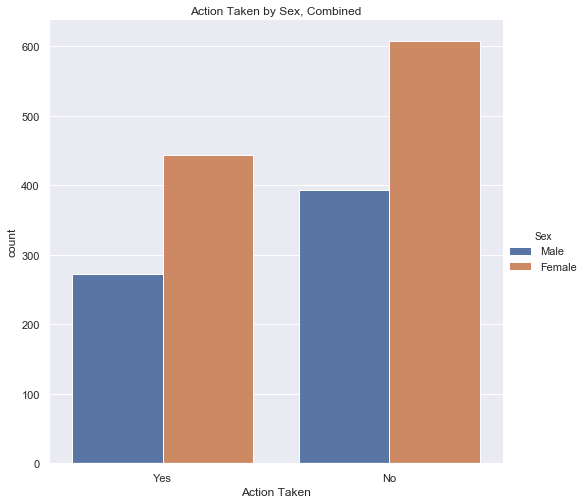

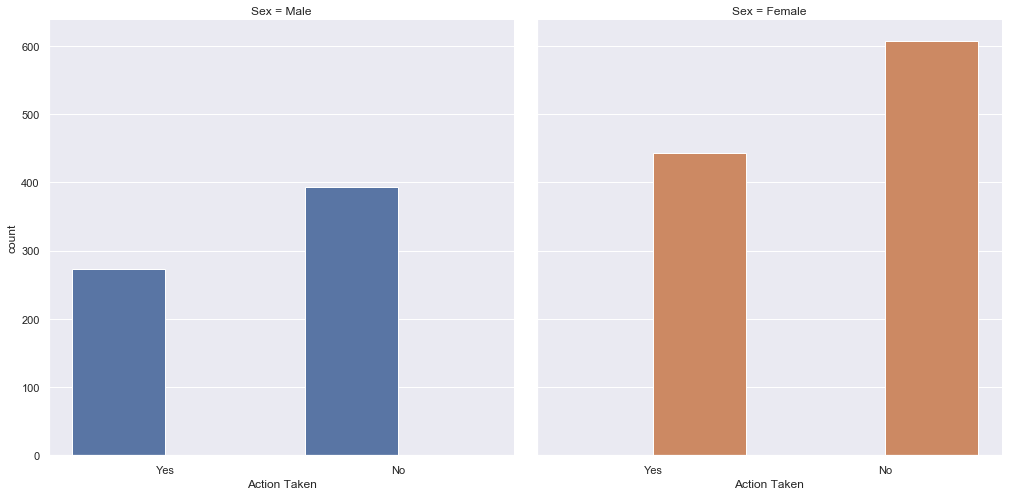

In [22]:
# Adapted from [5]
v = sns.catplot(x="Action Taken", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Action Taken by Sex, Combined")
g = sns.catplot(x="Action Taken", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

Weighted % Males - Verbal Action:  21.9
Weighted % Males - Written Action:  6.67
Weighted % Males - Legal or Offical Action:  9.52
Weighted % Males - No Action:  61.9

Weighted % Females - Verbal Action:  25.0
Weighted % Females - Written Action:  8.33
Weighted % Females - Legal or Offical Action:  8.33
Weighted % Females - No Action:  58.33



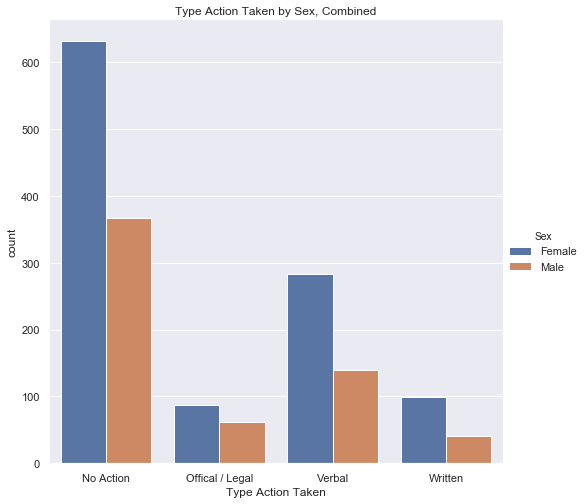

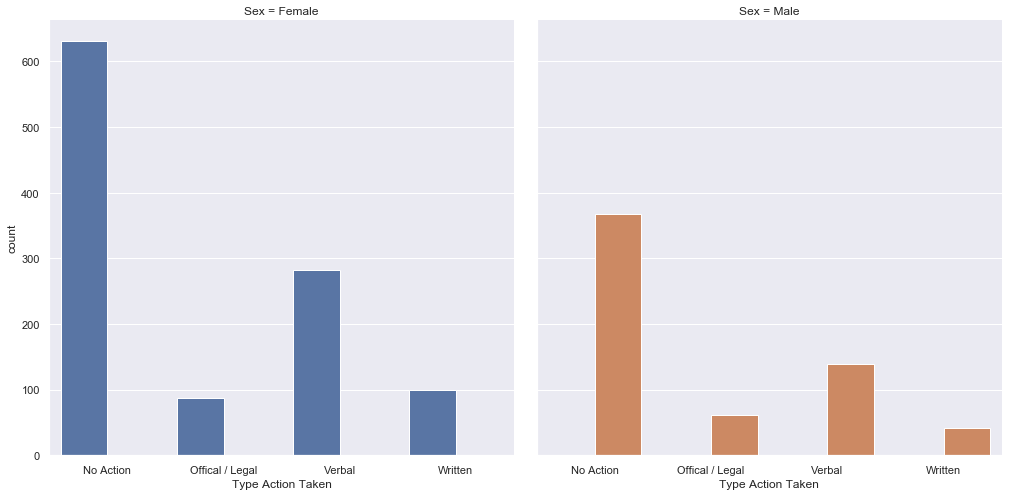

In [16]:
print("Weighted % Males - Verbal Action: ", round(ver_m*100,2))
print("Weighted % Males - Written Action: ", round(wri_m*100,2))
print("Weighted % Males - Legal or Offical Action: ", round(off_m*100,2))
print("Weighted % Males - No Action: ", round(noa_m*100,2))
print()

print("Weighted % Females - Verbal Action: ", round(ver_f*100,2))
print("Weighted % Females - Written Action: ", round(wri_f*100,2))
print("Weighted % Females - Legal or Offical Action: ", round(off_f*100,2))
print("Weighted % Females - No Action: ", round(noa_f*100,2))
print()

# Adapted from [5]

v = sns.catplot(x="Type Action Taken", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Type Action Taken by Sex, Combined")
g = sns.catplot(x="Type Action Taken", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

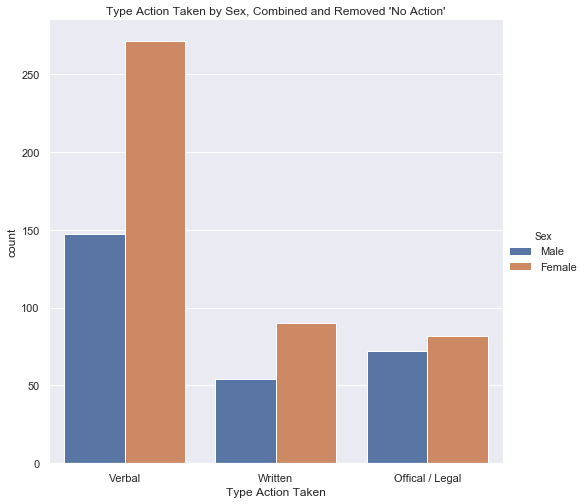

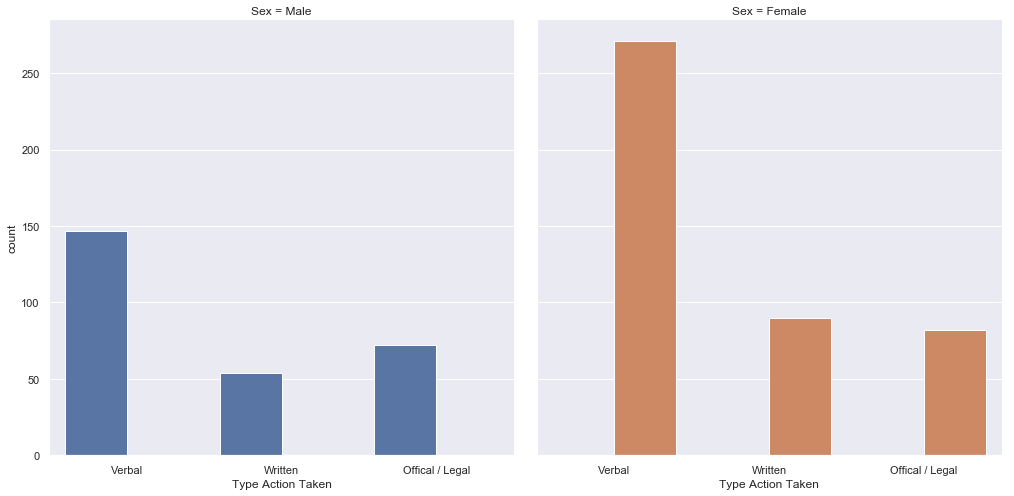

In [24]:
# Adapted from [5]
df_act_yes =  df['Action Taken']=='Yes'
df_yes_act = df[df_act_yes]

v = sns.catplot(x="Type Action Taken", hue="Sex",
                data=df_yes_act, kind="count",
                height=7, aspect=1);
v.set(title="Type Action Taken by Sex, Combined and Removed 'No Action'")
g = sns.catplot(x="Type Action Taken", hue="Sex", col="Sex",
                data=df_yes_act, kind="count",
                height=7, aspect=1);

By reviewing the type of action taken, it can be seen that males are approximately 3.5% less likely to take action. Although, as more females reported having experienced more discrimination, this ~3.5% subsequently results in a large figure of pure counts. 

If action is taken, both males and females are most likely to take verbal action. Followed by official or legal action for males and finally followed by written action. For females, written action and legal / official action carry the same weighted probability. However, they are ~1.2% less likely than males to follow official or legal action.


## References

1.	https://www.cso.ie/en/releasesandpublications/er/q-eq/qnhsequalitymodulequarter32014/
2.	https://www.qualtrics.com/support/survey-platform/data-and-analysis-module/response-weighting/
3.	https://pandas.pydata.org/pandas-docs/stable/merging.html
4.	http://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.DataFrame.sort.html
5.	https://seaborn.pydata.org/generated/seaborn.countplot.html
6.	https://seaborn.pydata.org/tutorial/categorical.html
7.	https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
8.	https://www.cso.ie/en/qnhs/abouttheqnhs/whatistheqnhs/
